## <font color='green'> <div align="center">In the name of God </div></font>

### <font color='red'> Author: Sayed Kamaledin Ghiasi-Shrirazi</font> <a href="http://profsite.um.ac.ir/~k.ghiasi">(http://profsite.um.ac.ir/~k.ghiasi)</a> 

### Perceptron

In [56]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.io as sio
from tqdm import tqdm
import matplotlib.animation as animation

In [57]:
%matplotlib inline
mpl.rcParams['figure.dpi']= 150

In [58]:
MnistTrainX = sio.loadmat ('../../datasets/mnist/MnistTrainX')['MnistTrainX'] / 255;
MnistTrainY = sio.loadmat ('../../datasets/mnist/MnistTrainY')['MnistTrainY'];
MnistTestX  = sio.loadmat ('../../datasets/mnist/MnistTestX')['MnistTestX'] / 255;
MnistTestY  = sio.loadmat ('../../datasets/mnist/MnistTestY')['MnistTestY'];

In [59]:
XTrain = MnistTrainX
yTrain = MnistTrainY.squeeze()

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [03:01<00:00, 14.15s/it]


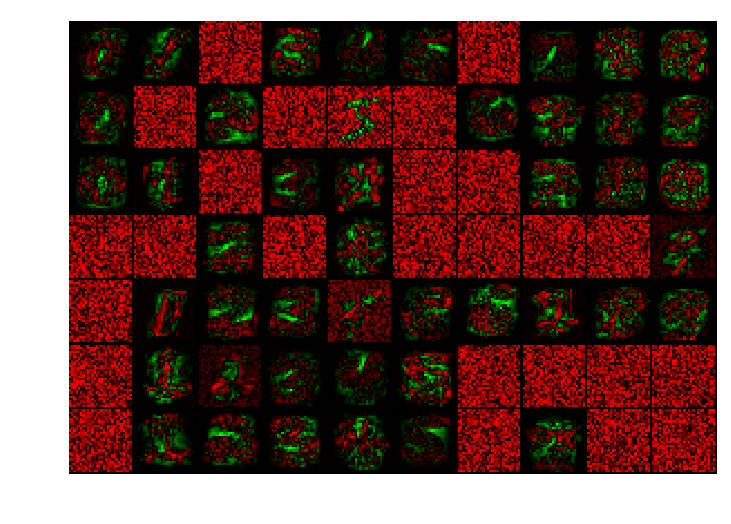

In [60]:
K = 7
C = 10
maxEpoch = 20
(N, dim) = XTrain.shape
W = np.random.rand(K*C, dim)
b = np.zeros ([K*C])

fig = plt.figure()
metadata = dict(title='Perceptron7Prototype', artist='Matplotlib',
                comment='Movie support!')
pillowWriter = animation.writers['pillow']
moviewriter = pillowWriter(fps=4, metadata=metadata)
moviewriter.setup(fig=fig, outfile='Perceptron7Prototype.gif', dpi=150)

for i in tqdm (range(maxEpoch)):
    for j in range (N):
        x = XTrain[j,:]
        t = yTrain[j]
        z = (W @ x) + b      
        
        r = np.argmax (z)
        y = r // K
        if (y != t):
            s = t*K + np.argmax(z[t*K:(t+1)*K])            
            W[r,:] -= x
            W[s,:] += x
            b[r] -= 1
            b[s] += 1
        if (j % 10000==9999):
            wholeImage = np.zeros ([K * 29, C * 29, 3])
            for u in range (C):
                for v in range (K):
                    img = np.reshape(W[u*K+v,:], [28,28])
                    img = img / np.max(abs(img))
                    posImage = np.maximum(0 , img)
                    negImage = np.maximum(0 , -img)
                    wholeImage[v * 29:(v+1)* 29 -1, u * 29:(u+1) * 29-1, 0] = posImage
                    wholeImage[v * 29:(v+1)* 29 -1, u * 29:(u+1) * 29-1, 1] = negImage
            plt.imshow (wholeImage)
            plt.axis('off')
            moviewriter.grab_frame()
moviewriter.finish()

In [62]:
XTest = MnistTestX
yTest = MnistTestY

score = 0.0
for j in range (XTest.shape[0]):
    x = XTest[j,:]
    t = yTest[j]
    value = W @ x + b
    max_idx = np.argmax(value)
    y = max_idx // K
    if (y == t):
        score += 1
print ('Accuracy on test data = {0}\%'.format (score/XTest.shape[0] * 100))

Accuracy on test data = 94.39999999999999\%
